## Importando Bibliotecas

In [190]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re

## Carregando a base de dados

In [191]:
dataset = pd.read_csv('data.csv')

In [192]:
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


## Explorando a base de dados

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [194]:
dataset.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [195]:
dataset.isnull().values.any()

False

## Tratando a base de dados

In [196]:
# removendo duplicatas
# dataset = dataset.drop_duplicates()
# dataset.head()

In [197]:
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [198]:
def normalizer(texto):  
    texto = re.sub(r'-', ' ', texto) # para que palavras com "Finnish-Russian" se tornem "finnish russian"
    texto =  re.sub(r'[^\w\s]', '', texto) # removendo pontuação
    texto = re.sub(r'[\d]', '', texto) # removendo números

    texto = word_tokenize(texto)# tokenizando
    texto = [word.lower() for word in texto]# colocando tudo em minúsculo
    texto = [word for word in texto if word not in (stop)]    # removendo stopwords
    texto = [lemmatizer.lemmatize(word, pos="v") for word in texto] # lematizando

    return texto



In [199]:
normalizer("Here is text about an airline I like.")

['text', 'airline', 'like']

In [200]:
dataset["normalizer"] = dataset["Sentence"].apply(normalizer)
dataset.head()

,Sentence,Sentiment,normalizer
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sales, double..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerce, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sell, remain, percent,..."


In [201]:
nltk.download('averaged_perceptron_tagger')

# Identificar as partes do discurso (substantivos, verbos, adjetivos, etc.)

dataset['pos_tags'] = dataset['normalizer'].apply(lambda x:nltk.pos_tag(x))
dataset['pos_tags']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0       [(geosolutions, NNS), (technology, NN), (lever...
1       [(esi, RB), (low, JJ), (bk, NN), (real, JJ), (...
2       [(last, JJ), (quarter, NN), (componenta, VBD),...
3       [(accord, NN), (finnish, JJ), (russian, JJ), (...
4       [(swedish, JJ), (buyout, IN), (firm, NN), (sel...
                              ...                        
5837    [(rise, NN), (cost, NN), (force, NN), (package...
5838    [(nordic, JJ), (walk, NN), (first, RB), (use, ...
5839    [(accord, NN), (ship, NN), (company, NN), (vik...
5840    [(build, VB), (home, NN), (improvement, NN), (...
5841    [(helsinki, NN), (afx, NN), (kci, NN), (konecr...
Name: pos_tags, Length: 5842, dtype: object

In [202]:
#VB: Verb, base form (verbo, forma base)
#VBD: Verb, past tense (verbo, passado)
#VBG: Verb, gerund or present participle (verbo, gerúndio ou particípio presente)
#VBN: Verb, past participle (verbo, particípio passado)
#VBP: Verb, non-3rd person singular present (verbo, presente não terceira pessoa singular)
#VBZ: Verb, 3rd person singular present (verbo, presente terceira pessoa singular)
#substantivos "NN"
#adjetivos "JJ"
#NN: Noun, singular or mass (substantivo, singular ou massivo)
#NNS: Noun, plural (substantivo, plural)
#NNP: Proper noun, singular (substantivo próprio, singular)
#NNPS: Proper noun, plural (substantivo próprio, plural)

dataset['only_vb'] = dataset['pos_tags'].apply(lambda x: [word[0] for word in x if word[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']])
dataset

,Sentence,Sentiment,normalizer,pos_tags,only_vb
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ...","[(geosolutions, NNS), (technology, NN), (lever...","[benefon, provide, platform]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, low, bk, real, possibility]","[(esi, RB), (low, JJ), (bk, NN), (real, JJ), (...",[]
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sales, double...","[(last, JJ), (quarter, NN), (componenta, VBD),...",[componenta]
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerce, ...","[(accord, NN), (finnish, JJ), (russian, JJ), (...",[]
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sell, remain, percent,...","[(swedish, JJ), (buyout, IN), (firm, NN), (sel...","[remain, take]"
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,"[rise, cost, force, package, producer, huhtama...","[(rise, NN), (cost, NN), (force, NN), (package...",[]
5838,Nordic Walking was first used as a summer trai...,neutral,"[nordic, walk, first, use, summer, train, meth...","[(nordic, JJ), (walk, NN), (first, RB), (use, ...",[use]
5839,"According shipping company Viking Line , the E...",neutral,"[accord, ship, company, viking, line, eu, deci...","[(accord, NN), (ship, NN), (company, NN), (vik...",[viking]
5840,"In the building and home improvement trade , s...",neutral,"[build, home, improvement, trade, sales, decre...","[(build, VB), (home, NN), (improvement, NN), (...","[build, decrease]"


In [203]:
def remover_NN(texto):
    if texto is None:
        return []  # Retorna uma lista vazia se texto for None
    novo_texto = [word for word in texto if not (word[1] in ["NN"])]
    return novo_texto

dataset["pos_tags"] = dataset["pos_tags"].apply(remover_NN)
dataset.head()

,Sentence,Sentiment,normalizer,pos_tags,only_vb
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ...","[(geosolutions, NNS), (benefon, VBD), (gps, JJ...","[benefon, provide, platform]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, low, bk, real, possibility]","[(esi, RB), (low, JJ), (real, JJ)]",[]
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sales, double...","[(last, JJ), (componenta, VBD), (net, JJ), (sa...",[componenta]
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerce, ...","[(finnish, JJ), (russian, JJ), (major, JJ)]",[]
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sell, remain, percent,...","[(swedish, JJ), (buyout, IN), (remain, VBP), (...","[remain, take]"


In [204]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
dataset['Sentiment'] = dataset['Sentiment'].apply(lambda x:sentiment2target(x))
dataset['Sentiment']

0       2
1       0
2       2
3       1
4       1
       ..
5837    0
5838    1
5839    1
5840    1
5841    2
Name: Sentiment, Length: 5842, dtype: int64

In [205]:

from sklearn.model_selection import train_test_split

def com(lista):
    lista = [palavras for palavras,_ in lista]
    return ' '.join(lista)

dataset['normalizer'] = dataset['normalizer'].apply(lambda x: ' '.join(x))
print(dataset['normalizer'])
x_train, x_test, y_train, y_test = train_test_split(dataset['normalizer'], dataset['Sentiment'], test_size=0.4, random_state=0)

0       geosolutions technology leverage benefon gps s...
1                             esi low bk real possibility
2       last quarter componenta net sales double eurm ...
3       accord finnish russian chamber commerce major ...
4       swedish buyout firm sell remain percent stake ...
                              ...                        
5837    rise cost force package producer huhtamaki axe...
5838    nordic walk first use summer train method cros...
5839    accord ship company viking line eu decision si...
5840    build home improvement trade sales decrease eu...
5841    helsinki afx kci konecranes say order four hot...
Name: normalizer, Length: 5842, dtype: object


In [210]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

# Criação do vetorizador com n-gramas (ngram_range=(1,2)) e ajuste aos dados de treinamento
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
x_train_vectorized = count_vectorizer.fit_transform(x_train)

# Treina o modelo SVM
clf = OneVsRestClassifier(svm.SVC(gamma='scale', 
                                  C=0.01, 
                                  probability=True, 
                                  class_weight='balanced', 
                                  kernel='poly', 
                                  degree= 2,
                                  coef0=54.9,  
                                  cache_size=1000,
                                  decision_function_shape="ovo"))

clf_output = clf.fit(x_train_vectorized, y_train)

# Transforma o conjunto de teste usando o mesmo vetorizador ajustado
x_test_vectorized = count_vectorizer.transform(x_test)

# Calcula a precisão do modelo no conjunto de teste
accuracy = clf.score(x_test_vectorized, y_test)
print(f'Acurácia no conjunto de teste: {accuracy}')


Acurácia no conjunto de teste: 0.6893453145057766


In [207]:
def test(coef):
    clf = OneVsRestClassifier(svm.SVC(gamma='scale', C=0.01, probability=True, class_weight='balanced', kernel='poly', degree= 2,coef0=coef))
    clf_output = clf.fit(x_train_vectorized, y_train)
    accuracy = clf.score(x_test_vectorized, y_test)
    print(f'Acurácia no conjunto de teste: {accuracy} como o {coef}')

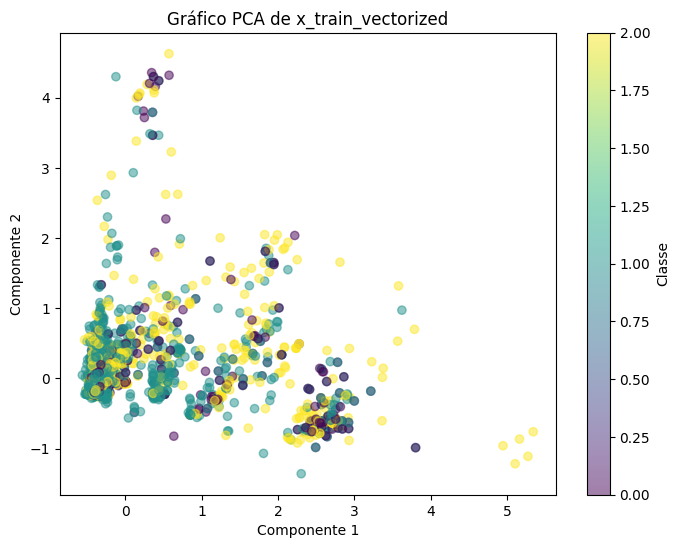

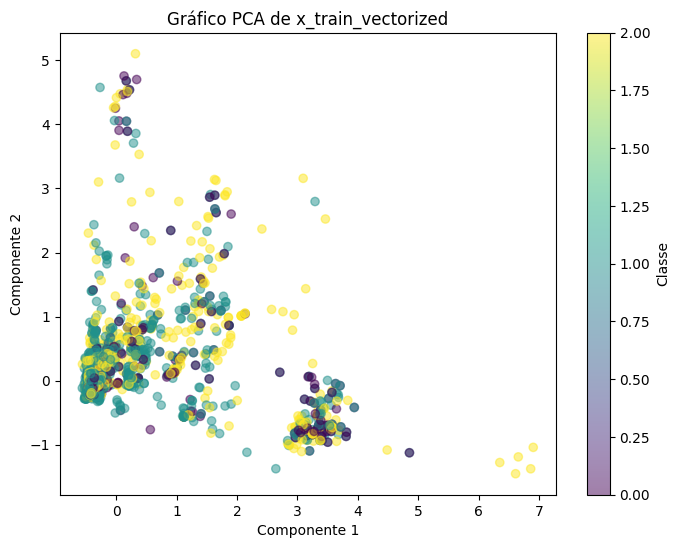

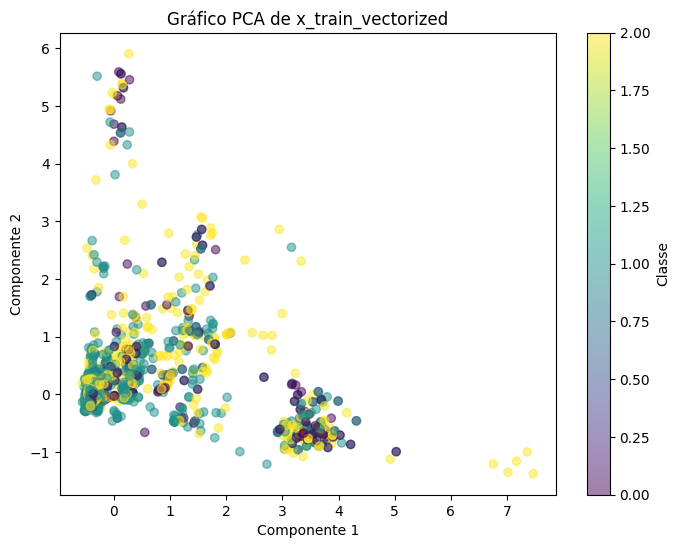

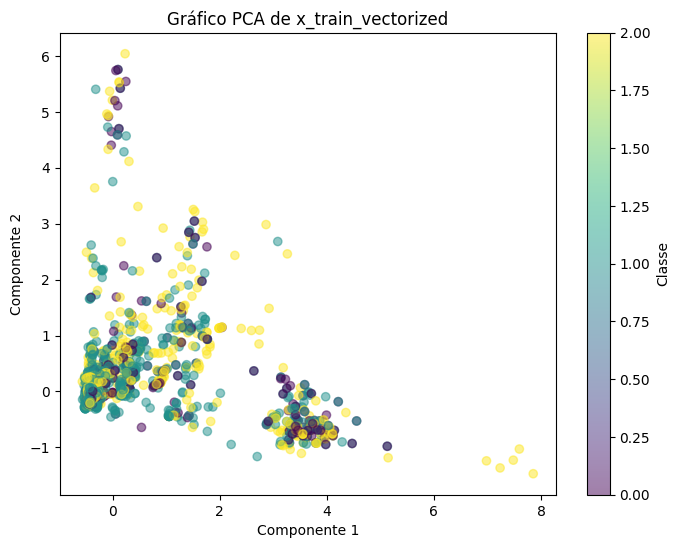

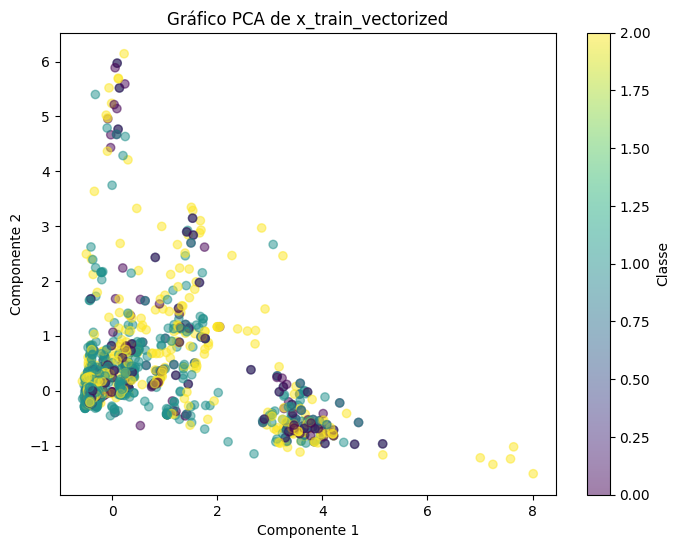

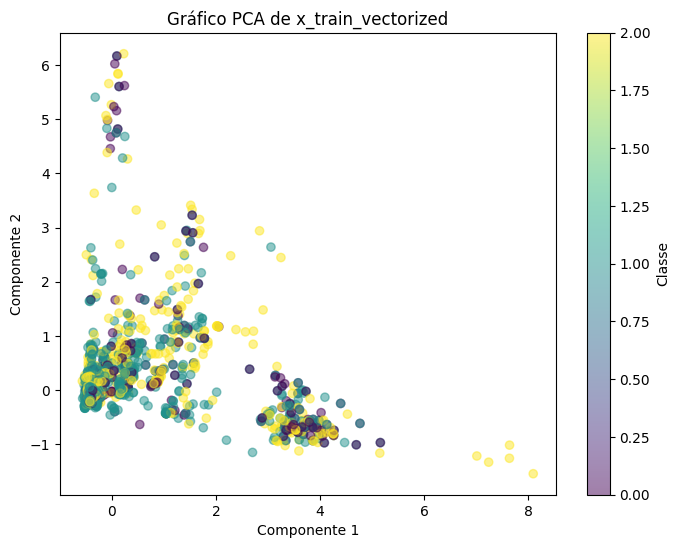

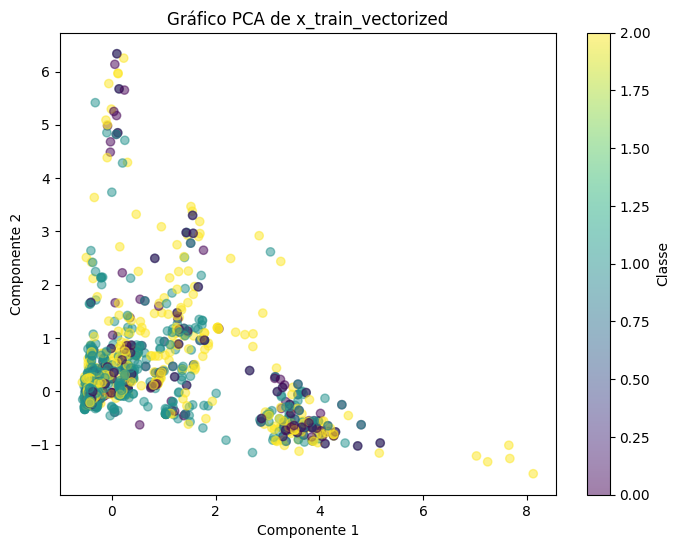

In [208]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

for i in range(8,8):
    count_vectorizer = CountVectorizer(ngram_range=(1,i))
    x_train_vectorized = count_vectorizer.fit_transform(x_train)

    # Aplicar PCA para reduzir a dimensionalidade para 2 componentes
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train_vectorized.toarray())  # Converte a matriz esparsa para densa para o PCA

    # Plota o gráfico 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.title('Gráfico PCA de x_train_vectorized')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.colorbar(label='Classe')
    plt.show()

